#### This script contains the following:

##### 1. Importing libraries and data and renaming columns
##### 2. The elbow technique
##### 3. k-means clustering

### Importing libraries and data and renaming columns

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [6]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [8]:
# Define path
path = r'C:\Users\Daniella\ACH6'

In [10]:
#data set
df_gun = pd.read_csv(os.path.join(path, 'Prepared Data', 'gun violence clean.csv'))

In [12]:
df_gun.shape

(239677, 24)

In [42]:
df_gun.dtypes

Incident ID                          int64
Date                        datetime64[ns]
State                             category
City or County                    category
Address                             object
Nº Killed                            int64
Nº Injured                           int64
Congressional District             float64
Gun Stolen                        category
Gun Type                          category
Incident Characteristics          category
Latitude                           float64
Location Description              category
Longitude                          float64
Nº Guns Involved                   float64
Participant Age                     object
Participant Age Group             category
Participant Gender                category
Participant Relationship          category
Participant Status                category
Participant Iype                  category
State House District                object
State Senate District               object
dtype: obje

In [51]:
df_gun.head(5)

,Incident ID,Date,State,City or County,Address,Nº Killed,Nº Injured,Congressional District,Gun Stolen,Gun Type,...,Longitude,Nº Guns Involved,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Iype,State House District,State Senate District
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Nan,Unknown,...,-79.8559,1.0,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unknown,Unknown
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,Nan,Unknown,...,-118.3330,1.0,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,Nan,Unknown,...,-104.8020,1.0,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Unknown,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [16]:
df_gun = df_gun.drop(columns=["Unnamed: 0"])

In [22]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['longitude'] = pd.to_numeric(df_gun['longitude'], errors='coerce')

In [24]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['latitude'] = pd.to_numeric(df_gun['latitude'], errors='coerce')

In [26]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['congressional_district'] = pd.to_numeric(df_gun['congressional_district'], errors='coerce')

In [28]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['n_guns_involved'] = pd.to_numeric(df_gun['n_guns_involved'], errors='coerce')

In [30]:
# Changing Data Types:
df_gun[['date']] = df_gun[['date']].astype('datetime64[ns]')

# Change these columns to 'category' data type
columns_to_category = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics', 'location_description', 'participant_age_group', 'participant_gender', 'participant_relationship', 'participant_status', 'participant_type']

df_gun[columns_to_category] = df_gun[columns_to_category].astype('category')

In [32]:
# Replace missing values with the mean 
df_gun['latitude'] = df_gun['latitude'].fillna(df_gun['latitude'].mean())
df_gun['longitude'] = df_gun['longitude'].fillna(df_gun['longitude'].mean())

In [34]:
# Replace missing values with the median:
df_gun['n_guns_involved'] = df_gun['n_guns_involved'].fillna(df_gun['n_guns_involved'].median())

In [36]:
# Replace missing values with the mode:
df_gun['congressional_district'] = df_gun['congressional_district'].fillna(df_gun['congressional_district'].mode()[0])

In [40]:
# Rename columns:
df_gun.rename(columns = {'incident_id' : 'Incident ID', 'date': 'Date', 'state': 'State', 'city_or_county': 'City or County', 'address': 'Address', 'n_killed' : 'Nº Killed', 'n_injured' : 'Nº Injured', 'congressional_district' : 'Congressional District', 'gun_stolen' : 'Gun Stolen', 'gun_type' : 'Gun Type', 'incident_characteristics' : 'Incident Characteristics', 'latitude' : 'Latitude', 'location_description' : 'Location Description', 'longitude' : 'Longitude', 'n_guns_involved' : 'Nº Guns Involved', 'participant_age' : 'Participant Age', 'participant_age_group' : 'Participant Age Group', 'participant_gender' : 'Participant Gender', 'participant_relationship' : 'Participant Relationship', 'participant_status' : 'Participant Status', 'participant_type' : 'Participant Iype', 'state_house_district' : 'State House District', 'state_senate_district' : 'State Senate District'}, inplace = True)

In [103]:
# Export new dataframe to csv
df_gun.to_csv(os.path.join(path, 'Prepared Data', 'gun_violence_renamed.csv'))

### 2. The elbow technique

In [45]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [53]:
# Drop non-numeric columns
df_gun_numeric = df_gun.select_dtypes(include=['number'])

In [57]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_gun_numeric).score(df_gun_numeric) for i in range(len(kmeans))]

C:\Users\Daniella\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Daniella\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [59]:
score

[-2.0594022692403252e+16,
 -5016077333951172.0,
 -2239530294091850.2,
 -1237503996321658.8,
 -760045705976968.2,
 -507969113321301.5,
 -373912753320714.8,
 -289063607354220.94,
 -234051487479512.44]

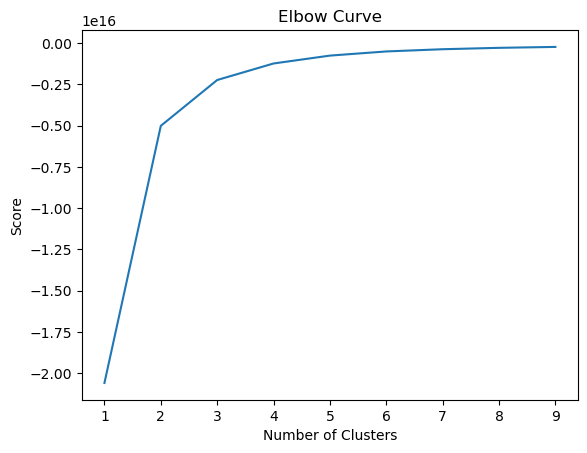

In [61]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis which means the optimal count for your clusters is three.

### 3. k-Means Clustering

In [66]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [70]:
# Fit the k-means object to the data.
kmeans.fit(df_gun_numeric)

KMeans(n_clusters=3)

In [72]:
df_gun_numeric['clusters'] = kmeans.fit_predict(df_gun_numeric)

In [74]:
df_gun_numeric.head()

,Incident ID,Nº Killed,Nº Injured,Congressional District,Latitude,Longitude,Nº Guns Involved,clusters
0,461105,0,4,14.0,40.3467,-79.8559,1.0,2
1,460726,1,3,43.0,33.9090,-118.3330,1.0,2
2,478855,1,3,9.0,41.4455,-82.1377,2.0,2
3,478925,4,0,6.0,39.6518,-104.8020,1.0,2
4,478959,2,2,6.0,36.1140,-79.9569,2.0,2


In [76]:
# Check the frequency of each unique value in the 'clusters' column
df_gun_numeric['clusters'].value_counts()

clusters
0    81774
1    79018
2    78885
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

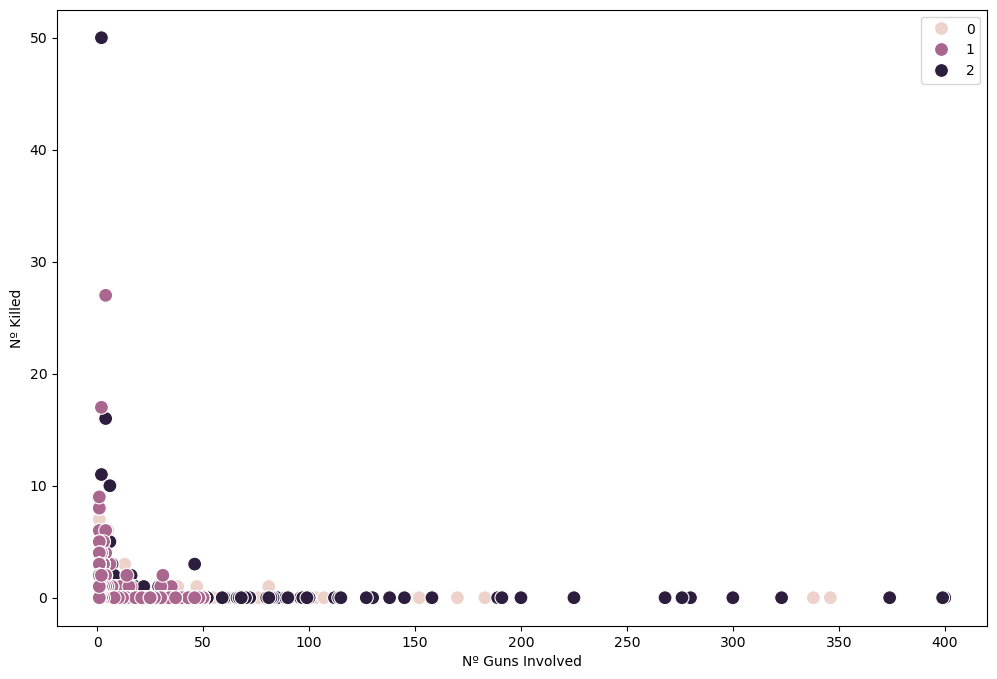

In [80]:
# Plot the clusters for the "Nº Killed" and "Nº Guns Involved" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gun_numeric['Nº Guns Involved'], y=df_gun_numeric['Nº Killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Nº Guns Involved') # Label x-axis.
plt.ylabel('Nº Killed') # Label y-axis.
plt.show()

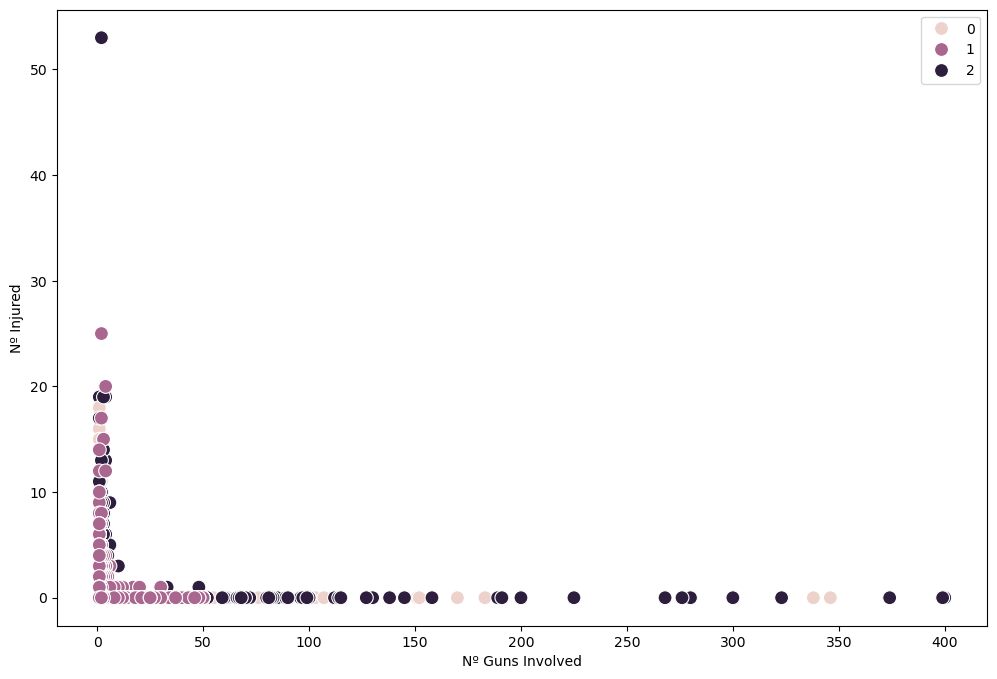

In [84]:
# Plot the clusters for the "Nº Injured" and "Nº Guns Involved" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gun_numeric['Nº Guns Involved'], y=df_gun_numeric['Nº Injured'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Nº Guns Involved') # Label x-axis.
plt.ylabel('Nº Injured') # Label y-axis.
plt.show()

In [90]:
df_gun_numeric.loc[df_gun_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_gun_numeric.loc[df_gun_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_gun_numeric.loc[df_gun_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [92]:
df_gun_numeric.groupby('cluster').agg({'Nº Killed':['mean', 'median'], 
                         'Nº Injured':['mean', 'median'], 
                         'Nº Guns Involved':['mean', 'median']})

Nº Killed        Nº Injured        Nº Guns Involved       
                 mean median       mean median             mean median
cluster                                                               
dark purple  0.257349    0.0   0.525372    0.0         1.286873    1.0
pink         0.247768    0.0   0.473757    0.0         1.112310    1.0
purple       0.251917    0.0   0.483649    0.0         1.258321    1.0

##### Nº Killed (Mean & Median): The mean number of people killed per incident is low across all clusters. The median for this metric is consistently 0, which tells us that most incidents in all clusters resulted in no deaths.
##### Nº Injured (Mean & Median): The mean number of injuries (mean) per incident is slightly higher than the number killed but the median again is 0 which suggests that most  incidents caused no injuries either.
##### Nº Guns Involved (Mean & Median): The average (mean) number of guns involved per incident is between 1.11 and 1.28. The median tends to be 1, which tells us that in most incidents a single gun was involved.

##### These results could be useful to understand how the availability of guns affect incident outcomes. This could be looked into by checking if stolen guns are more common in certain type of clusters.

In [96]:
# Export new dataframe to csv
df_gun_numeric.to_csv(os.path.join(path, 'Prepared Data', '6.5_gun_numeric_variables.csv'))